In [3]:
import pandas as pd

In [9]:
small_model_path = "gs://marin-us-east5/attributes/quality_filtering/llama-200m-perplexity/dclm-global-shard-01-of-10-7f21ab/local-shard_0_of_10/shard_00000000_processed.jsonl.zst"
large_model_path = "gs://marin-us-east5/attributes/quality_filtering/llama-500m-perplexity/dclm-global-shard-01-of-10/local-shard_0_of_10/local-shard_0_of_10/shard_00000000_processed.jsonl.zst"
file_path = "gs://marin-us-central2/raw/dclm/a3b142c/huggingface.co/datasets/mlfoundations/dclm-baseline-1.0/resolve/a3b142c/global-shard_01_of_10/local-shard_0_of_10/shard_00000000_processed.jsonl.zst"

In [10]:
df_small = pd.read_json(small_model_path, lines=True, compression="zstd")
df_large = pd.read_json(large_model_path, lines=True, compression="zstd")
df = pd.read_json(file_path, lines=True, compression="zstd")

df_small.head()
df_large.head()
df.head()

,bff_contained_ngram_count_before_dedupe,language_id_whole_page_fasttext,metadata,previous_word_count,text,url,warcinfo,fasttext_openhermes_reddit_eli5_vs_rw_v2_bigram_200k_train_prob
0,23,{'en': 0.932774245738983},"{'Content-Length': '71372', 'Content-Type': 'a...",535,Take the 2-minute tour ×\n\nHere what happened...,http://apple.stackexchange.com/questions/66593...,robots: classic\r\nhostname: ip-10-183-142-35....,0.112552
1,24,{'en': 0.9794756770133971},"{'Content-Length': '85841', 'Content-Type': 'a...",835,YOU ARE HERE: LAT HomeCollections\n(Page 2 of ...,http://articles.latimes.com/2001/feb/25/books/...,robots: classic\r\nhostname: ip-10-183-142-35....,0.019248
2,0,{'en': 0.9779581427574151},"{'Content-Length': '83835', 'Content-Type': 'a...",338,YOU ARE HERE: LAT HomeCollectionsEducation\n(P...,http://articles.latimes.com/2011/jul/25/local/...,robots: classic\r\nhostname: ip-10-183-142-35....,0.052738
3,20,{'en': 0.938261985778808},"{'Content-Length': '61769', 'Content-Type': 'a...",268,Take the 2-minute tour ×\n\nI just installed U...,http://askubuntu.com/questions/114277/ubuntu-d...,robots: classic\r\nhostname: ip-10-183-142-35....,0.085554
4,20,{'en': 0.903200030326843},"{'Content-Length': '67694', 'Content-Type': 'a...",502,Take the 2-minute tour ×\n\nWhen I used the ex...,http://askubuntu.com/questions/149632/ubuntu-n...,robots: classic\r\nhostname: ip-10-183-142-35....,0.042927


In [12]:
df_small['small-perplexity'] = df_small.apply(lambda row: row['attributes']['llama-200m-perplexity-seq-len-512'], axis=1)
df_large['large-perplexity'] = df_large.apply(lambda row: row['attributes']['llama-500m-perplexity-seq-len-512'], axis=1)

df['small-perplexity'] = df_small['small-perplexity']
df['large-perplexity'] = df_large['large-perplexity']

df.head()

,bff_contained_ngram_count_before_dedupe,language_id_whole_page_fasttext,metadata,previous_word_count,text,url,warcinfo,fasttext_openhermes_reddit_eli5_vs_rw_v2_bigram_200k_train_prob,small-perplexity,large-perplexity
0,23,{'en': 0.932774245738983},"{'Content-Length': '71372', 'Content-Type': 'a...",535,Take the 2-minute tour ×\n\nHere what happened...,http://apple.stackexchange.com/questions/66593...,robots: classic\r\nhostname: ip-10-183-142-35....,0.112552,19.774139,13.590554
1,24,{'en': 0.9794756770133971},"{'Content-Length': '85841', 'Content-Type': 'a...",835,YOU ARE HERE: LAT HomeCollections\n(Page 2 of ...,http://articles.latimes.com/2001/feb/25/books/...,robots: classic\r\nhostname: ip-10-183-142-35....,0.019248,40.573902,29.684498
2,0,{'en': 0.9779581427574151},"{'Content-Length': '83835', 'Content-Type': 'a...",338,YOU ARE HERE: LAT HomeCollectionsEducation\n(P...,http://articles.latimes.com/2011/jul/25/local/...,robots: classic\r\nhostname: ip-10-183-142-35....,0.052738,27.274065,20.362579
3,20,{'en': 0.938261985778808},"{'Content-Length': '61769', 'Content-Type': 'a...",268,Take the 2-minute tour ×\n\nI just installed U...,http://askubuntu.com/questions/114277/ubuntu-d...,robots: classic\r\nhostname: ip-10-183-142-35....,0.085554,17.053638,13.125348
4,20,{'en': 0.903200030326843},"{'Content-Length': '67694', 'Content-Type': 'a...",502,Take the 2-minute tour ×\n\nWhen I used the ex...,http://askubuntu.com/questions/149632/ubuntu-n...,robots: classic\r\nhostname: ip-10-183-142-35....,0.042927,21.049461,16.393335


In [14]:
df = df[['text', 'small-perplexity', 'large-perplexity']]
df.head()

,text,small-perplexity,large-perplexity
0,Take the 2-minute tour ×\n\nHere what happened...,19.774139,13.590554
1,YOU ARE HERE: LAT HomeCollections\n(Page 2 of ...,40.573902,29.684498
2,YOU ARE HERE: LAT HomeCollectionsEducation\n(P...,27.274065,20.362579
3,Take the 2-minute tour ×\n\nI just installed U...,17.053638,13.125348
4,Take the 2-minute tour ×\n\nWhen I used the ex...,21.049461,16.393335


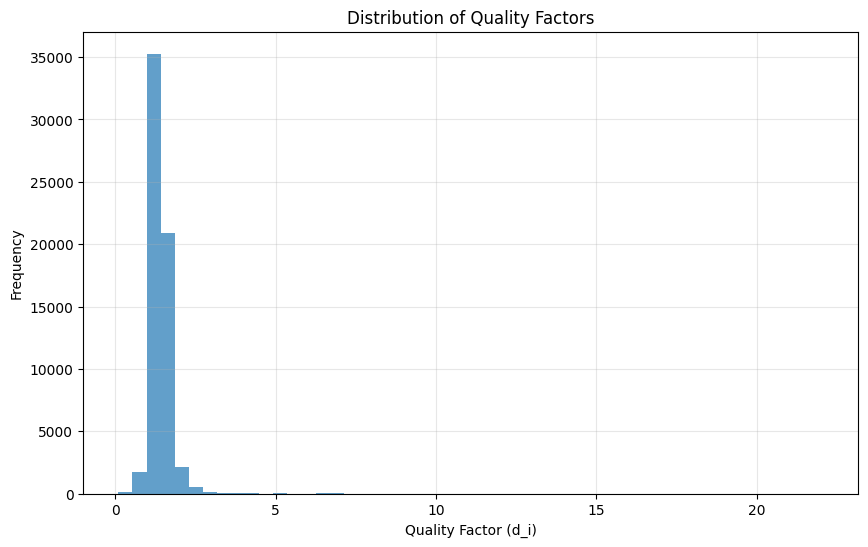

In [32]:
df['quality-factor'] = df['small-perplexity'] / df['large-perplexity']

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['quality-factor'], bins=50, alpha=0.7)
plt.xlabel('Quality Factor (d_i)')
plt.ylabel('Frequency')
plt.title('Distribution of Quality Factors')
plt.grid(True, alpha=0.3)
plt.show()


In [24]:
df.sort_values(by='quality-factor', ascending=False, inplace=True)

In [50]:
df

,text,small-perplexity,large-perplexity,quality-factor
21831,Pokemon Conspiracy Theories Part 3. I don't th...,184.703156,8.372898,22.059644
39721,Type Analysis & Frequency\n\nDiscussion in 'BW...,58.119427,3.128723,18.576085
34281,BigSM's Castle Crashers PlayStation Trophies\n...,23.707125,1.446264,16.391972
6729,"January 25th, 2013\n\nWhat happened to the con...",40.573902,3.304590,12.278042
11366,DarkRedCrash's Limbo PlayStation Trophies\n\nV...,25.790340,2.117000,12.182495
...,...,...,...,...
7912,"Du Fu\n\nFrom Wikipedia, the free encyclopedia...",4.883868,28.771208,0.169748
34488,Home RSSRSS\n\nChanging Bootup Resolution ...,2.235997,14.091115,0.158681
17983,"Thriller (genre)\n\nFrom Wikipedia, the free e...",2.297982,17.450615,0.131685
36234,"\nUser reviews: Mostly Positive (1,002 reviews...",5.118249,41.861851,0.122265


In [ ]:
middle_5  = list(df.iloc[1000:1005]['text'])

In [49]:
print(top_5[0])

Pokemon Conspiracy Theories Part 3. I don't think I'm going to get as many thumbs this time around because it's such a read, but I really enjoyed this one, and

Pokemon Conspiracy Theories Part 3

I don't think I'm going to get as many thumbs this time around because it's such a ******** read, but I really enjoyed this one, and I hope you do too! Comment on what you think I should do next!
#1! I love you all!
Part 1-...more »

#1! I love you all!
Part 1-funnyjunk.com/funny_pictures/2424826/Pokemon+Conspiracy+Theories+Comp/
Part 2-funnyjunk.com/funny_pictures/2429131/Pokemon+Conspiracy+Theories+Comp+Part2/

Conspiracy Theories PART 3
This is my last Pokemon one, so
please comment on what next
conspiracy comp I should do!
1. Golduck' s and Psyduck' s names were switched
Psyduck is gold, while golduck has more psychic power t would
make more sense to have their names the otherway around
Psyduck Golduck
2. The pokemon regions are located in Japan
I' m unaware of where Unova is located, the